In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_excel('/content/Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


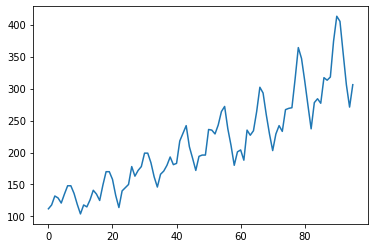

In [17]:
data.Passengers.plot()

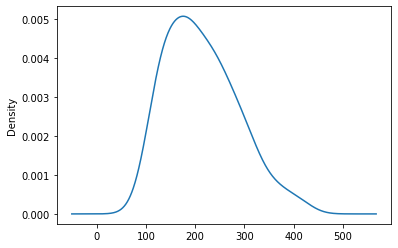

In [18]:
data.Passengers.plot(kind='kde')

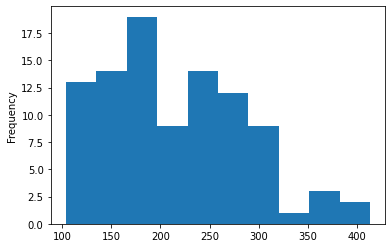

In [19]:
data.Passengers.plot(kind='hist')

In [20]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction

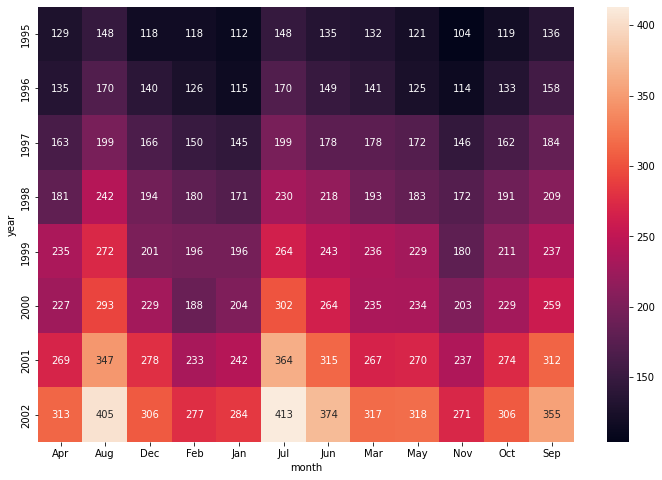

In [21]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

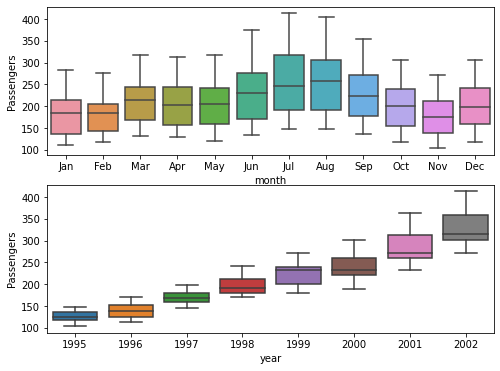

In [22]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

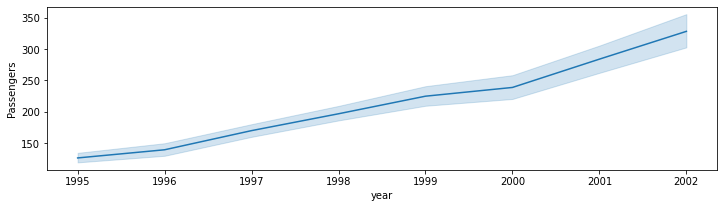

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

Decomposition

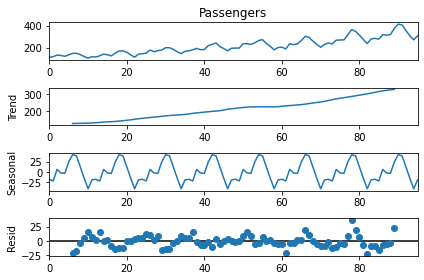

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

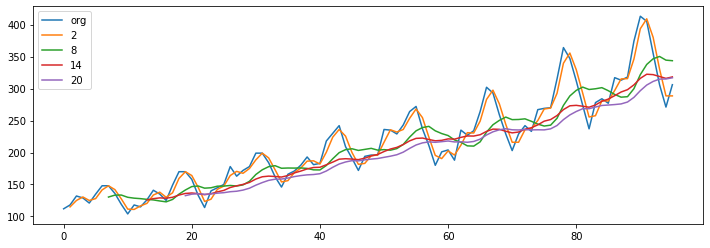

In [25]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

ACF and PACF

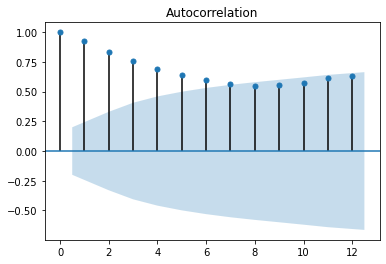

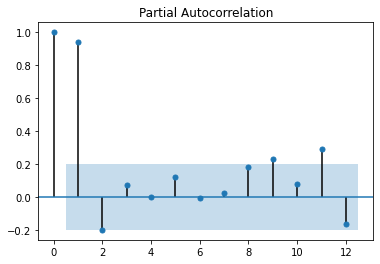

In [26]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [27]:
data['t'] = range(1, len(data) + 1)
data['log_Passengers'] = np.log2(data['Passengers'])
data['t_square'] = (data['t'])*(data['t'])
data = pd.get_dummies(data, columns=['month'])

In [28]:
data

,Month,Passengers,Date,year,t,log_Passengers,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,6.807355,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,6.882643,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,7.044394,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,7.011227,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,6.918863,25,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,92,8.661778,8464,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,93,8.471675,8649,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,94,8.257388,8836,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,95,8.082149,9025,0,0,0,0,0,0,0,0,0,1,0,0


Splitting data in to training 

In [29]:
Train = data.head(78)
Test = data.tail(18)

In [32]:
Test

,Month,Passengers,Date,year,t,log_Passengers,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
78,2001-07-01,364,2001-07-01,2001,79,8.507795,6241,0,0,0,0,0,1,0,0,0,0,0,0
79,2001-08-01,347,2001-08-01,2001,80,8.438792,6400,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,2001-09-01,2001,81,8.285402,6561,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,2001-10-01,2001,82,8.098032,6724,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,2001-11-01,2001,83,7.888743,6889,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,2001-12-01,2001,84,8.118941,7056,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,2002-01-01,2002,85,8.149747,7225,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,2002-02-01,2002,86,8.113742,7396,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,2002-03-01,2002,87,8.308339,7569,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,2002-04-01,2002,88,8.290019,7744,1,0,0,0,0,0,0,0,0,0,0,0


In [33]:
Train

,Month,Passengers,Date,year,t,log_Passengers,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,6.807355,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,6.882643,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,7.044394,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,7.011227,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,6.918863,25,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2001-02-01,233,2001-02-01,2001,74,7.864186,5476,0,0,0,1,0,0,0,0,0,0,0,0
74,2001-03-01,267,2001-03-01,2001,75,8.060696,5625,0,0,0,0,0,0,0,1,0,0,0,0
75,2001-04-01,269,2001-04-01,2001,76,8.071462,5776,1,0,0,0,0,0,0,0,0,0,0,0
76,2001-05-01,270,2001-05-01,2001,77,8.076816,5929,0,0,0,0,0,0,0,0,1,0,0,0


#Linear Model

In [34]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.33895543334942

#Exponential

In [35]:
Exp = smf.ols('log_Passengers~t',data=data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

3681.478360087258

#Quadratic

In [36]:
 Quad = smf.ols('Passengers~t+t_square',data=data).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.9338024319693

#Additive seasonality 


In [37]:
add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=data).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

105.6062113466817

#Additive Seasonality Quadratic 

In [38]:
add_sea_Quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

18.675314311136876

##Multiplicative Seasonality

In [39]:
Mul_sea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1912.3512962088284

#Multiplicative Additive Seasonality 

In [40]:
Mul_Add_sea = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

3823.5257811068213

#Compare the results 

In [41]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,18.675314
2,rmse_Quad,46.933802
0,rmse_linear,48.338955
3,rmse_add_sea,105.606211
5,rmse_Mult_sea,1912.351296
1,rmse_Exp,3681.478360
6,rmse_Mult_add_sea,3823.525781
